#Exploratory Data Analysis on Book Summary

In [410]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup as bs
import requests

import string
from collections import Counter

import matplotlib.pyplot as plt
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [361]:
books_data = pd.read_csv('/content/book_summaries.csv', encoding = 'latin1', error_bad_lines=False)
books_data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3524: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version.


  exec(code_obj, self.user_global_ns, self.user_ns)


,title,category,summary
0,Steve Jobs,biography,"Walter Isaacson's ""enthralling"" (The New Yorke..."
1,John Adams,biography,"The enthralling, often surprising story of Joh..."
2,Becoming,biography,In a life filled with meaning and accomplishme...
3,The Shining,horror,Jack Torrance's new job at the Overlook Hotel ...
4,Carrie,horror,The story of misunderstood high school girl C...


In [362]:
summary = [x.strip() for x in books_data.summary]
summary[1]

'The enthralling, often surprising story of John Adams, one of the most important and fascinating Americans who ever lived.In this powerful, epic biography, David McCullough unfolds the adventurous life-journey of John Adams, the brilliant, fiercely independent, often irascible, always honest Yankee patriot -- "the colossus of independence," as Thomas Jefferson called him - The enthralling, often surprising story of John Adams, one of the most important and fascinating Americans who ever lived.In this powerful, epic biography, David McCullough unfolds the adventurous life-journey of John Adams, the brilliant, fiercely independent, often irascible, always honest Yankee patriot -- "the colossus of independence," as Thomas Jefferson called him -- who spared nothing in his zeal for the American Revolution; who rose to become the second President of the United States and saved the country from blundering into an unnecessary war; who was learned beyond all but a few and regarded by some as "

## Data pre-processing

In [363]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
wordnet = WordNetLemmatizer()
import re

filtered_sum=[]


filtered_sent=[]
for i in range(len(summary)):
    summary_ = re.sub("[^A-Za-z" "]+"," ",summary[i])
    summary_ = re.sub("[0-9" "]+"," ",summary[i])
    
    summary_ = summary_.lower()
    summary_ =summary_.split()
    summary_ = [wordnet.lemmatize(word) for word in summary_ if not word in set(stopwords.words('english'))]
    summary_ = ' '.join(summary_)
    filtered_sum.append(summary_)

In [364]:
filtered_sum[1]

'enthralling, often surprising story john adams, one important fascinating american ever lived.in powerful, epic biography, david mccullough unfolds adventurous life-journey john adams, brilliant, fiercely independent, often irascible, always honest yankee patriot -- "the colossus independence," thomas jefferson called - enthralling, often surprising story john adams, one important fascinating american ever lived.in powerful, epic biography, david mccullough unfolds adventurous life-journey john adams, brilliant, fiercely independent, often irascible, always honest yankee patriot -- "the colossus independence," thomas jefferson called -- spared nothing zeal american revolution; rose become second president united state saved country blundering unnecessary war; learned beyond regarded "out senses"; whose marriage wise valiant abigail adam one moving love story american history. like masterly, pulitzer prize-winning biography truman, david mccullough\'s john adam sweep vitality great nov

In [365]:

    
with open("negative-words.txt","r", encoding='latin-1') as neg:
    negwords = neg.read().split("\n")

In [366]:
with open("positive-words.txt","r") as pos:
    poswords = pos.read().split("\n")

## Vectorization

In [367]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf = TfidfVectorizer()
text_tf = tf.fit_transform(filtered_sum)
feature_names = tf.get_feature_names()
dense = text_tf.todense()
denselist = dense.tolist()
summary_df =pd.DataFrame(denselist, columns=feature_names)
summary_df.head()

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aaron,abigail,ability,able,abundantly,academy,access,accomplishment,ache,active,...,written,xvi,yankee,year,years,yet,yorker,young,zeal,zone
0,0.047486,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.142458,0.000000,0.000000,0.000000,0.094972,0.0,0.110585,0.0,0.000000,0.0
1,0.028399,0.066136,0.0,0.0,0.033068,0.0,0.033068,0.000000,0.0,0.000000,...,0.000000,0.033068,0.066136,0.022517,0.000000,0.0,0.000000,0.0,0.033068,0.0
2,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.135475,0.0,0.067737,...,0.000000,0.000000,0.000000,0.046125,0.000000,0.0,0.000000,0.0,0.000000,0.0
3,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.054547,0.000000,0.0,0.000000,0.0,0.000000,0.0
4,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.0,0.000000,0.0


# Exploratory Data Analysis

## Wordcloud

In [368]:
#plotting wordcloud on TFIDF
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = ' '.join(summary_df)



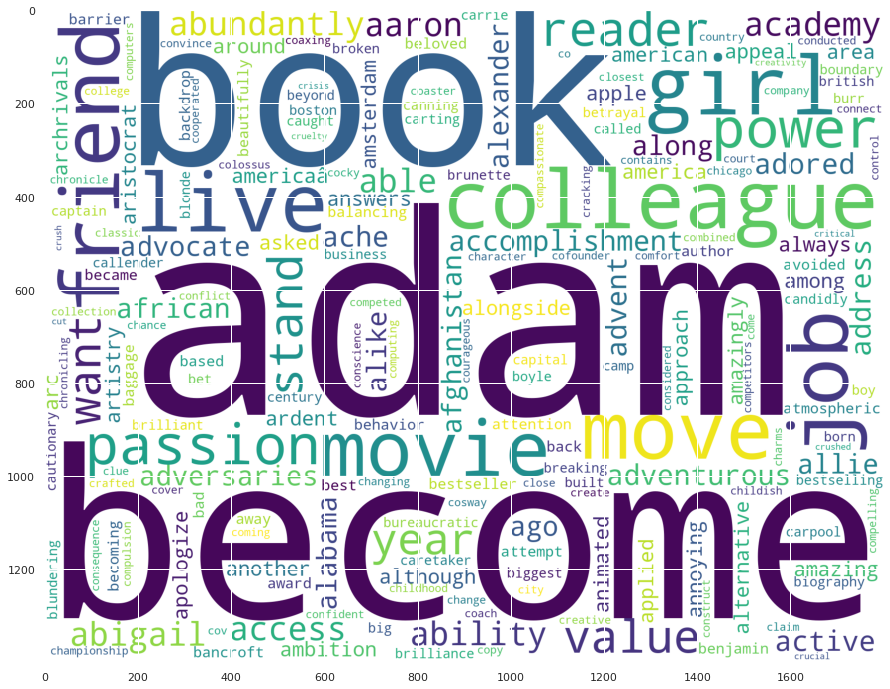

In [369]:
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'white',
        width = 1800,
        height =1400).generate(cloud)
plt.imshow(wordcloud)

## Positive words

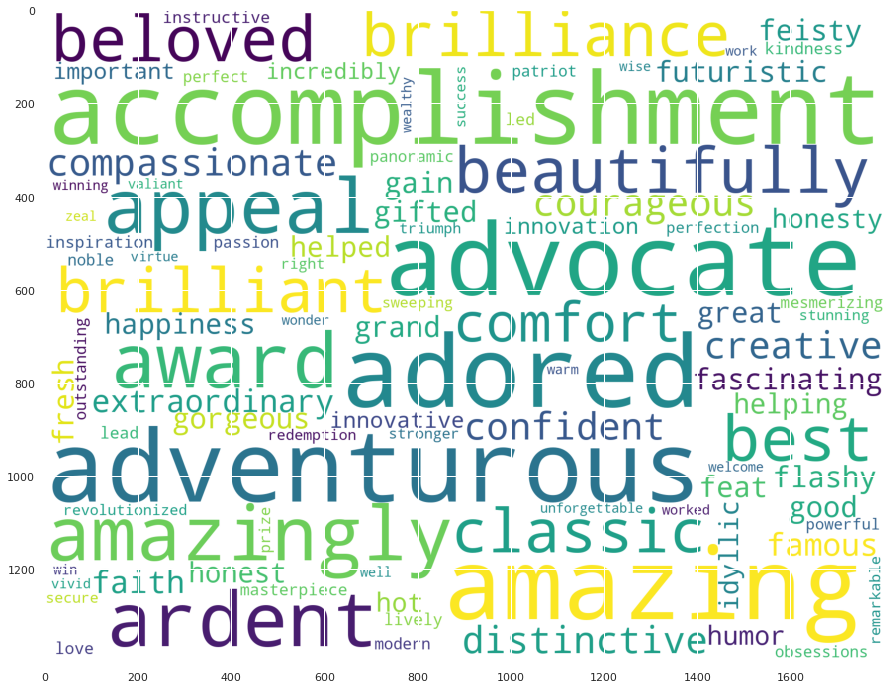

In [370]:
f, axes = plt.subplots(figsize=(20,12))
pos_words = ' '.join([w for w in summary_df if w in poswords])

cloud_pos = WordCloud(
        background_color = 'white',
        width =1800,
        height=1400).generate(pos_words)
plt.imshow(cloud_pos)

## negative Words

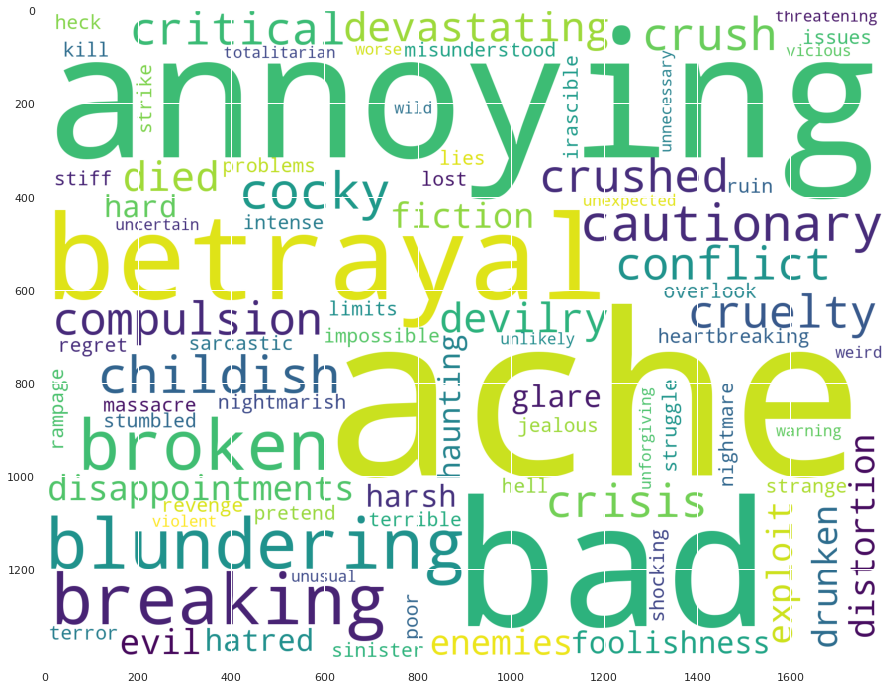

In [371]:
f, axes = plt.subplots(figsize=(20,12))
neg_words = ' '.join([w for w in summary_df if w in negwords])

cloud_neg = WordCloud(
        background_color='white',
        width =1800,
        height =1400).generate(neg_words)
plt.imshow(cloud_neg)

## word cloud Category wise

In [437]:
summary_df

,aaron,abigail,ability,able,abundantly,academy,access,accomplishment,ache,active,...,written,xvi,yankee,year,years,yet,yorker,young,zeal,zone
0,0.047486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.142458,0.0,0.0,0.0,0.094972,0.0,0.110585,0.0,0.0,0.0


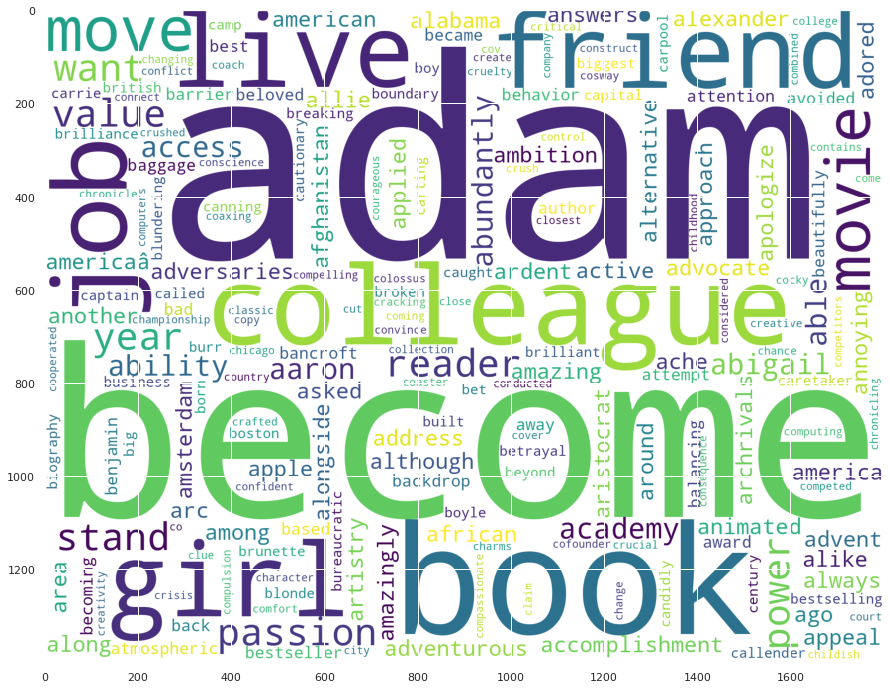

In [460]:
#biography
#plotting wordcloud on TFIDF
from wordcloud import WordCloud
import matplotlib.pyplot as plt
cloud = ' '.join(summary_df[0:3])

f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'white',
        width = 1800,
        height =1400).generate(cloud)
plt.imshow(wordcloud)



## Parts of Speech distribution analysis : Categorizing and POS tagging the words

In [473]:
nltk.download('universal_tagset')
def get_pos_tags(sentences, tagset='universal'):
    ''' Extract the part-of-speech taggings of the sentence
        Input:
        - sentence: string, sentence to tag
        - tagset: string, tagset or the set of tags to search for
    '''
    #Create the Dataframe to store the count of tags
    df = pd.DataFrame(columns=['ADJ','ADP','ADV','CONJ','DET','NOUN','NUM','PRT','PRON','VERB','.','X'])
    for sent in sentences:
        # Extract the part of Speech tags in the sentence
        pos_tags = Counter([j for i,j in nltk.pos_tag(word_tokenize(sent), tagset='universal')])
        #Appends the pos tags to the dataframe, fill NaN values with 0
        df = df.append(pos_tags, ignore_index=True).fillna(0)

    return df.astype(int)


sum_text = books_data.filtered_summary.values
df_text = get_pos_tags(sum_text)



[nltk_data] Downloading package universal_tagset to /root/nltk_data...
[nltk_data]   Package universal_tagset is already up-to-date!


In [474]:
books_data_POS = pd.concat([books_data, df_text], axis=1)
books_data_POS.head(2)


,title,category,summary,filtered_summary,Subjectivity,Polarity,sentiment_value,word_count,ADJ,ADP,ADV,CONJ,DET,NOUN,NUM,PRT,PRON,VERB,.,X
0,Steve Jobs,biography,"Walter Isaacson's ""enthralling"" (The New Yorke...","walter isaacson's ""enthralling"" (the new yorke...",0.741193,0.395170,23,199,31,5,7,0,2,116,4,3,1,37,57,0
1,John Adams,biography,"The enthralling, often surprising story of Joh...","enthralling, often surprising story john adams...",0.556901,0.266564,78,413,89,6,39,0,4,195,8,7,3,52,117,2


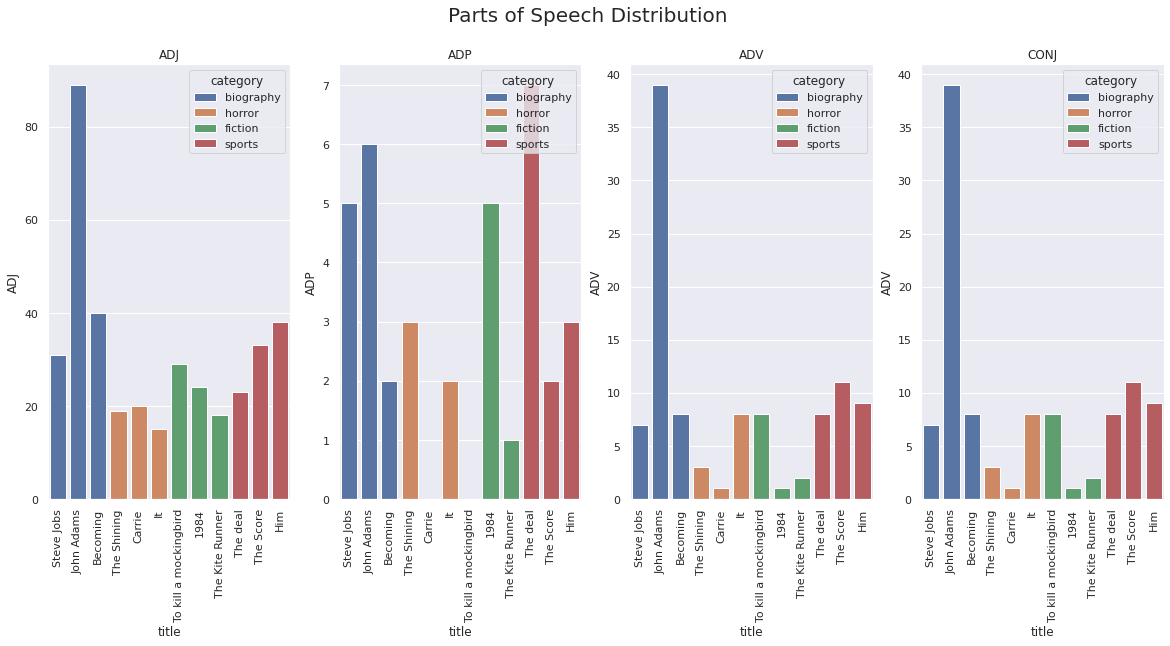

In [475]:

def pos_tagging(em1, em2, em3, em4):
  sns.set(font_scale = 1)
  fig, axes = plt.subplots(1, 4,figsize=(20,8))

  g= sns.barplot(x = 'title', y = em1, data = books_data_POS, ax = axes[0], hue="category",dodge=False)
  g= sns.barplot(x = 'title', y = em2, data = books_data_POS, ax = axes[1], hue="category", dodge=False)
  g= sns.barplot(x = 'title', y = em3, data = books_data_POS, ax = axes[2], hue="category",dodge=False)
  g= sns.barplot(x = 'title', y = em3, data = books_data_POS, ax = axes[3], hue="category", dodge=False)

  axes[0].set_xticklabels(labels = books_data_POS["title"].values, rotation=90)
  axes[0].set_title(em1)
  axes[1].set_xticklabels(labels = books_data_POS["title"].values, rotation=90)
  axes[1].set_title(em2)
  axes[2].set_xticklabels(labels = books_data_POS["title"].values, rotation=90)
  axes[2].set_title(em3)
  axes[3].set_xticklabels(labels = books_data_POS["title"].values, rotation=90)
  axes[3].set_title(em4)
  
  plt.suptitle("Parts of Speech Distribution", fontsize = 20)

pos_tagging('ADJ', 'ADP', 'ADV', 'CONJ')

#ADP: adposition : in, to, during
# ADV: Ver, well
# CONJ: And, or, but



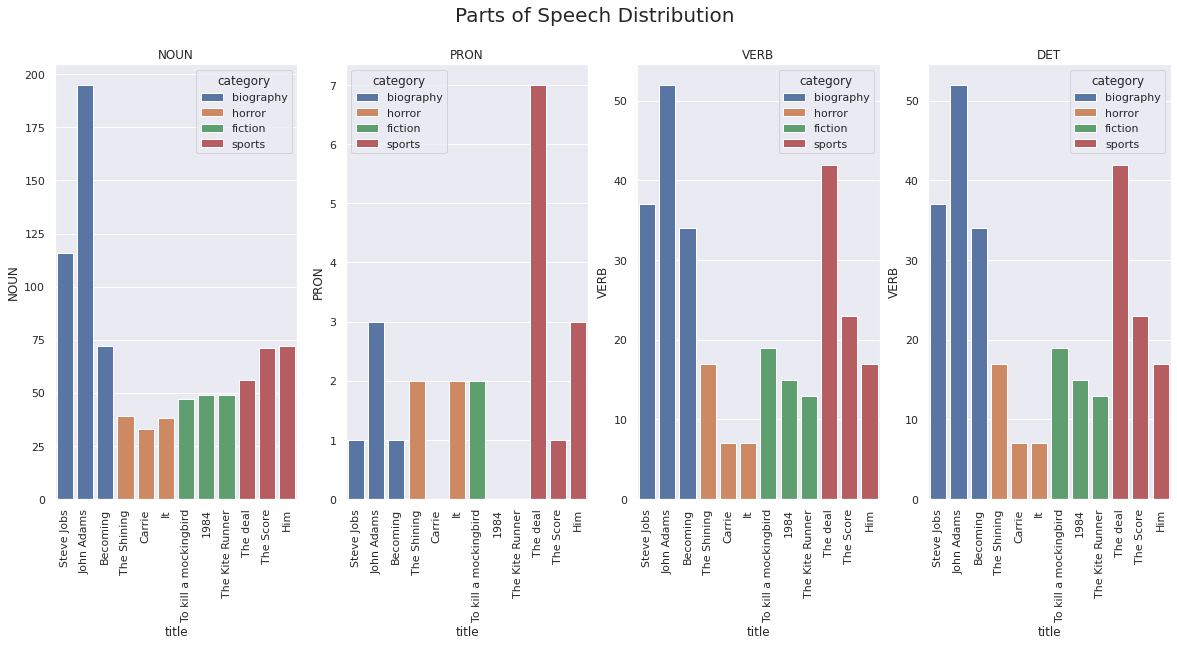

In [476]:
pos_tagging('NOUN', 'PRON', 'VERB', 'DET')

### Determiner (DET)
#### Determiners are words that modify nouns or noun phrases and express the reference of the noun phrase in context. 

possessive determiners (which modify a nominal): [cs] můj, tvůj, jeho, její, náš, váš, jejich; [en] my, your<br>
demonstrative determiners: this as in I saw this car yesterday.<br>
interrogative determiners: which as in “Which car do you like?”<br>
relative determiners: which as in “I wonder which car you like.”<br>
quantity determiners (quantifiers): indefinite any, universal: all, and negative no as in “We have no cars available.”

#Unique words

In [477]:
from textblob import TextBlob
books_data['textblob_sentiment'] = books_data['filtered_summary'].apply(lambda x: TextBlob(x).sentiment[0])
books_data['Unique Terms'] = books_data['filtered_summary'].str.split().explode().drop_duplicates().groupby(level=0).apply(list)

In [479]:
books_data[["title","category","Unique Terms"]]

,title,category,Unique Terms
0,Steve Jobs,biography,"[walter, isaacson's, ""enthralling"", (the, new,..."
1,John Adams,biography,"[enthralling,, often, surprising, john, adams,..."
2,Becoming,biography,"[meaning, accomplishment,, michelle, obama, em..."
3,The Shining,horror,"[jack, torrance's, overlook, hotel, perfect, c..."
4,Carrie,horror,"[misunderstood, high, school, carrie, white,, ..."
5,It,horror,"[welcome, derry,, maine, ...itâs, small, cit..."
6,To kill a mockingbird,fiction,"[unforgettable, sleepy, southern, town, crisis..."
7,1984,fiction,"[among, seminal, text, th, century,, nineteen,..."
8,The Kite Runner,fiction,"[unforgettable,, heartbreaking, unlikely, weal..."
9,The deal,sports,"[alternative, cover, edition, found, here.she'..."


## N- Grams

In [494]:
import collections
import re
import sys
import time


def listandtokenize(data):
  yourlist = data.tolist()
  string = ' '.join(map(str, yourlist))
  return re.findall(r'w+', string.lower())


# function to prepare n-grams
def count_ngrams(lines, min_length=2, max_length=4):
    lengths = range(min_length, max_length+1)
    ngrams = {length: collections.Counter() for length in lengths}
    queue = collections.deque(maxlen = max_length)
    def add_queue():
        current = tuple(queue)
        for length in lengths:
            if len(current)>= length:
                ngrams[length][current[:length]] +=1
    for line in lines:
        for word in nltk.word_tokenize(line):
            queue.append(word)
            if len(queue) >= max_length:
                add_queue()
    while len(queue) > min_length:
        queue.popleft()
        add_queue()
    return ngrams
  

# function to print 15 most frequent n-grams
# change the print number as applicable
def print_most_freq_ng(ngrams, num=15):
    for n in sorted(ngrams):
        print('----{} most frequent {}-grams ----'.format(num, n))
        for gram, count in ngrams[n].most_common(num):
            print('{0}: {1}'.format(' '.join(gram), count))
        print('')




In [495]:
print_most_freq_ng(count_ngrams(summary_df))

----15 most frequent 2-grams ----
aaron abigail: 1
abigail ability: 1
ability able: 1
able abundantly: 1
abundantly academy: 1
academy access: 1
access accomplishment: 1
accomplishment ache: 1
ache active: 1
active adam: 1
adam adams: 1
adams address: 1
address adored: 1
adored advent: 1
advent adventurous: 1

----15 most frequent 3-grams ----
aaron abigail ability: 1
abigail ability able: 1
ability able abundantly: 1
able abundantly academy: 1
abundantly academy access: 1
academy access accomplishment: 1
access accomplishment ache: 1
accomplishment ache active: 1
ache active adam: 1
active adam adams: 1
adam adams address: 1
adams address adored: 1
address adored advent: 1
adored advent adventurous: 1
advent adventurous adversaries: 1

----15 most frequent 4-grams ----
aaron abigail ability able: 1
abigail ability able abundantly: 1
ability able abundantly academy: 1
able abundantly academy access: 1
abundantly academy access accomplishment: 1
academy access accomplishment ache: 1
acc

## Calculating Subjectivity and polarity
<b>Subjectivity</b> is nothing but a sentence that expresses some personal feelings, views, or beliefs. Its values range from 0 to 1 where 0 is very objective and 1 is very subjective,

while <b>polarity</b> simply means emotions expressed in a sentence. Its value ranges from -1 to 1, where -1 represents the most negative comment and 1 represent the most positive comment

In [372]:
books_data["filtered_summary"] = filtered_sum
books_data

,title,category,summary,filtered_summary
0,Steve Jobs,biography,"Walter Isaacson's ""enthralling"" (The New Yorke...","walter isaacson's ""enthralling"" (the new yorke..."
1,John Adams,biography,"The enthralling, often surprising story of Joh...","enthralling, often surprising story john adams..."
2,Becoming,biography,In a life filled with meaning and accomplishme...,"life filled meaning accomplishment, michelle o..."
3,The Shining,horror,Jack Torrance's new job at the Overlook Hotel ...,jack torrance's new job overlook hotel perfect...
4,Carrie,horror,The story of misunderstood high school girl C...,story misunderstood high school girl carrie wh...
5,It,horror,"Welcome to Derry, Maine ...Itâs a small city...","welcome derry, maine ...itâs small city, pla..."
6,To kill a mockingbird,fiction,The unforgettable novel of a childhood in a sl...,unforgettable novel childhood sleepy southern ...
7,1984,fiction,"Among the seminal texts of the 20th century, N...","among seminal text th century, nineteen eighty..."
8,The Kite Runner,fiction,"The unforgettable, heartbreaking story of the ...","unforgettable, heartbreaking story unlikely fr..."
9,The deal,sports,An alternative cover edition can be found here...,alternative cover edition found here.she's mak...


In [375]:
from textblob import TextBlob

def calc_subj(sum_):
    return TextBlob(sum_).sentiment.subjectivity
 
# function for Polarity
def calc_pola(sum_):
    return TextBlob(sum_).sentiment.polarity
 
books_data['Subjectivity'] = books_data.filtered_summary.apply(calc_subj)
books_data['Polarity'] = books_data.filtered_summary.apply(calc_pola)
books_data

,title,category,summary,filtered_summary,Subjectivity,Polarity
0,Steve Jobs,biography,"Walter Isaacson's ""enthralling"" (The New Yorke...","walter isaacson's ""enthralling"" (the new yorke...",0.741193,0.395170
1,John Adams,biography,"The enthralling, often surprising story of Joh...","enthralling, often surprising story john adams...",0.556901,0.266564
2,Becoming,biography,In a life filled with meaning and accomplishme...,"life filled meaning accomplishment, michelle o...",0.441176,0.202050
3,The Shining,horror,Jack Torrance's new job at the Overlook Hotel ...,jack torrance's new job overlook hotel perfect...,0.579947,0.066043
4,Carrie,horror,The story of misunderstood high school girl C...,story misunderstood high school girl carrie wh...,0.562576,-0.114848
5,It,horror,"Welcome to Derry, Maine ...Itâs a small city...","welcome derry, maine ...itâs small city, pla...",0.340351,0.197368
6,To kill a mockingbird,fiction,The unforgettable novel of a childhood in a sl...,unforgettable novel childhood sleepy southern ...,0.386813,0.174359
7,1984,fiction,"Among the seminal texts of the 20th century, N...","among seminal text th century, nineteen eighty...",0.538462,-0.140659
8,The Kite Runner,fiction,"The unforgettable, heartbreaking story of the ...","unforgettable, heartbreaking story unlikely fr...",0.777083,0.291667
9,The deal,sports,An alternative cover edition can be found here...,alternative cover edition found here.she's mak...,0.712731,-0.047454


## Affinity score finds out the semantic relations between the words

In [376]:
with open("afinn2.txt","r") as affin:
    affinity = affin.read().split("\n")

In [377]:
affinity_data = pd.read_csv('afinn2.txt', sep="\t", header=None, names=["word", "value"])
affinity_data.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [378]:
affinity_scores = affinity_data.set_index('word')['value'].to_dict()
#affinity_scores

In [379]:
#pip install spacy
import spacy
nlp = spacy.load("en_core_web_sm")
sentiment_lexicon = affinity_scores

In [380]:
def calculate_sentiment(text: str = None):
    sent_score = 0
    if text:
        sentence = nlp(text)
        for word in sentence:
            sent_score += sentiment_lexicon.get(word.lemma_, 0)
    return sent_score

In [381]:
books_data['sentiment_value'] = books_data['filtered_summary'].apply(calculate_sentiment)
books_data

,title,category,summary,filtered_summary,Subjectivity,Polarity,sentiment_value
0,Steve Jobs,biography,"Walter Isaacson's ""enthralling"" (The New Yorke...","walter isaacson's ""enthralling"" (the new yorke...",0.741193,0.395170,23
1,John Adams,biography,"The enthralling, often surprising story of Joh...","enthralling, often surprising story john adams...",0.556901,0.266564,78
2,Becoming,biography,In a life filled with meaning and accomplishme...,"life filled meaning accomplishment, michelle o...",0.441176,0.202050,23
3,The Shining,horror,Jack Torrance's new job at the Overlook Hotel ...,jack torrance's new job overlook hotel perfect...,0.579947,0.066043,6
4,Carrie,horror,The story of misunderstood high school girl C...,story misunderstood high school girl carrie wh...,0.562576,-0.114848,-24
5,It,horror,"Welcome to Derry, Maine ...Itâs a small city...","welcome derry, maine ...itâs small city, pla...",0.340351,0.197368,19
6,To kill a mockingbird,fiction,The unforgettable novel of a childhood in a sl...,unforgettable novel childhood sleepy southern ...,0.386813,0.174359,24
7,1984,fiction,"Among the seminal texts of the 20th century, N...","among seminal text th century, nineteen eighty...",0.538462,-0.140659,-4
8,The Kite Runner,fiction,"The unforgettable, heartbreaking story of the ...","unforgettable, heartbreaking story unlikely fr...",0.777083,0.291667,17
9,The deal,sports,An alternative cover edition can be found here...,alternative cover edition found here.she's mak...,0.712731,-0.047454,-3


In [382]:
# how many words are in the sentence?
books_data['word_count'] = books_data['filtered_summary'].str.split().apply(len)
books_data

,title,category,summary,filtered_summary,Subjectivity,Polarity,sentiment_value,word_count
0,Steve Jobs,biography,"Walter Isaacson's ""enthralling"" (The New Yorke...","walter isaacson's ""enthralling"" (the new yorke...",0.741193,0.395170,23,199
1,John Adams,biography,"The enthralling, often surprising story of Joh...","enthralling, often surprising story john adams...",0.556901,0.266564,78,413
2,Becoming,biography,In a life filled with meaning and accomplishme...,"life filled meaning accomplishment, michelle o...",0.441176,0.202050,23,166
3,The Shining,horror,Jack Torrance's new job at the Overlook Hotel ...,jack torrance's new job overlook hotel perfect...,0.579947,0.066043,6,83
4,Carrie,horror,The story of misunderstood high school girl C...,story misunderstood high school girl carrie wh...,0.562576,-0.114848,-24,61
5,It,horror,"Welcome to Derry, Maine ...Itâs a small city...","welcome derry, maine ...itâs small city, pla...",0.340351,0.197368,19,76
6,To kill a mockingbird,fiction,The unforgettable novel of a childhood in a sl...,unforgettable novel childhood sleepy southern ...,0.386813,0.174359,24,113
7,1984,fiction,"Among the seminal texts of the 20th century, N...","among seminal text th century, nineteen eighty...",0.538462,-0.140659,-4,98
8,The Kite Runner,fiction,"The unforgettable, heartbreaking story of the ...","unforgettable, heartbreaking story unlikely fr...",0.777083,0.291667,17,83
9,The deal,sports,An alternative cover edition can be found here...,alternative cover edition found here.she's mak...,0.712731,-0.047454,-3,142


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


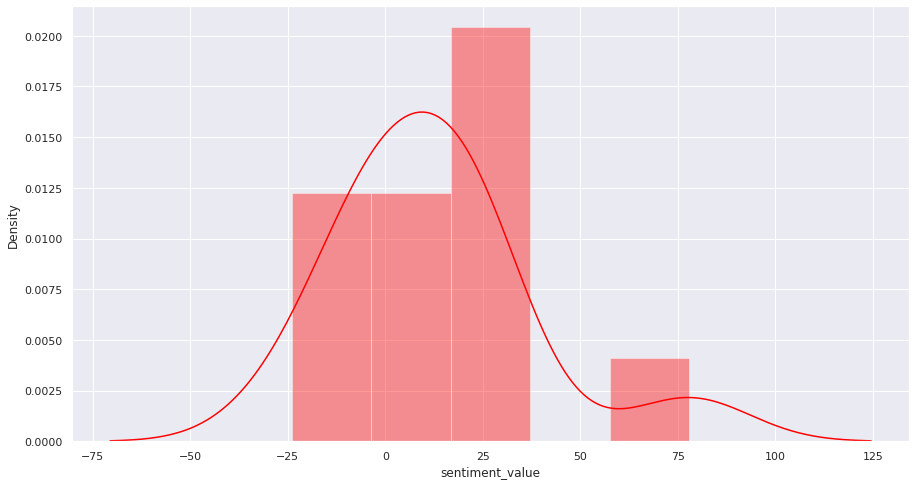

In [383]:
f, axes = plt.subplots(figsize= (15,8))
import seaborn as sns
sns.distplot(books_data['sentiment_value'],color = "red")
plt.show()

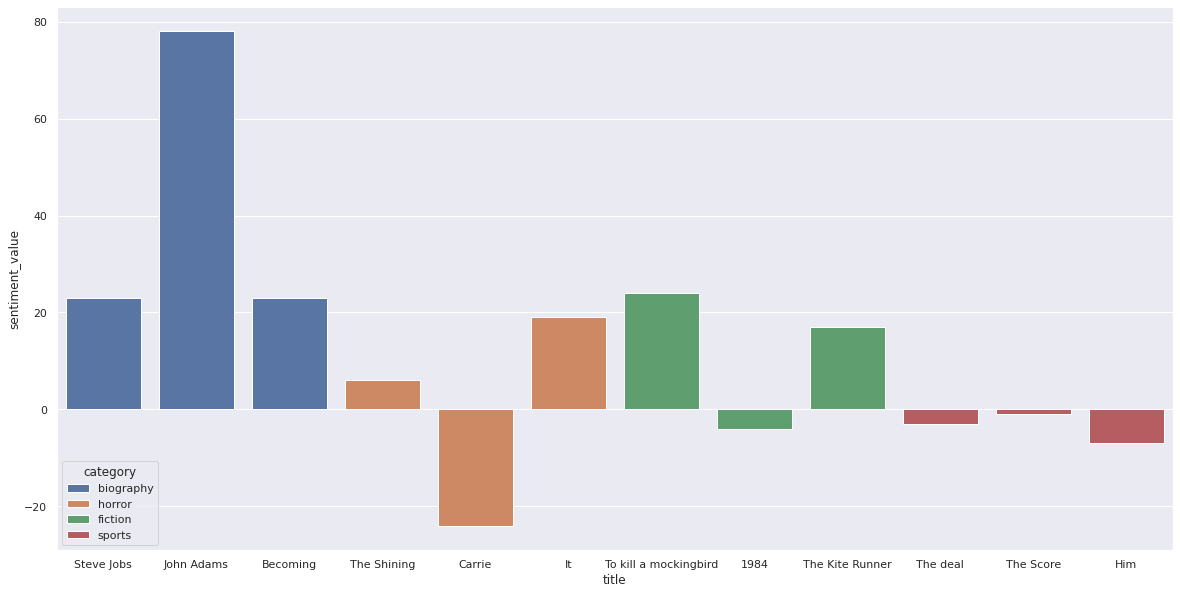

In [384]:
plt.figure(figsize=(20, 10))
sns.barplot(y='sentiment_value',x='title',data=books_data, hue="category", dodge=False)


## Sentiment value to Word count

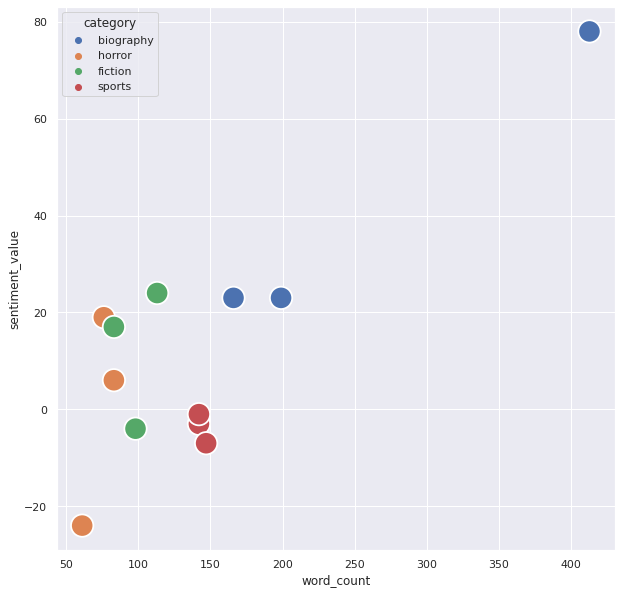

In [385]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data=books_data, x="word_count", y="sentiment_value", hue="category", s=500)

## Subjectivity and Polarity Analysis

In [407]:
from plotly.offline import iplot
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)
import plotly.io as pio
pio.renderers.default = "colab"

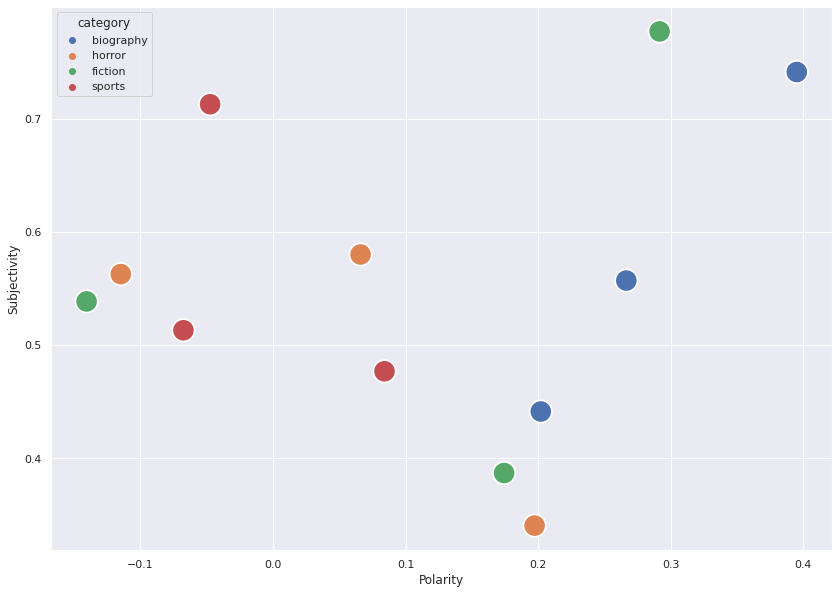

In [386]:
plt.figure(figsize=(14, 10))
sns.scatterplot(data=books_data, x="Polarity", y="Subjectivity", hue="category", s=500)

## Raw emotion scores

In [387]:
#!pip install NRCLex
import nltk
from nrclex import NRCLex

In [388]:
emotion_ = NRCLex(books_data[4:5].filtered_summary[4])

In [389]:
emotion_.raw_emotion_scores


{'trust': 6,
 'anticipation': 4,
 'joy': 2,
 'positive': 8,
 'anger': 6,
 'disgust': 4,
 'fear': 12,
 'negative': 12,
 'surprise': 4}

In [390]:
anger=[];disgust=[];fear=[];joy=[];surprise=[];trust=[];anticipation=[];sadness=[];positive=[];negative=[]
emotions= ["anger","disgust","fear","joy","surprise","trust","anticipation","sadness","positive","negative"]


for i,j in enumerate(books_data.filtered_summary.values,0):
  #print(i)
  emotion = NRCLex(j)

  if "positive" in emotion.raw_emotion_scores.keys():
    positive.append(emotion.raw_emotion_scores['positive'])
  else:
    positive.append(0)


  if "anger" in emotion.raw_emotion_scores.keys():
    anger.append(emotion.raw_emotion_scores['anger'])
  else:
    anger.append(0)

  if "disgust" in emotion.raw_emotion_scores.keys():
    disgust.append(emotion.raw_emotion_scores['disgust'])
  else:
    disgust.append(0)

  if "fear" in emotion.raw_emotion_scores.keys():
    fear.append(emotion.raw_emotion_scores['fear'])
  else:
    fear.append(0)

  if "joy" in emotion.raw_emotion_scores.keys():
    joy.append(emotion.raw_emotion_scores['joy'])
  else:
    joy.append(0)

  if "surprise" in emotion.raw_emotion_scores.keys():
    surprise.append(emotion.raw_emotion_scores['surprise'])
  else:
    surprise.append(0)

  if "trust" in emotion.raw_emotion_scores.keys():
    trust.append(emotion.raw_emotion_scores['trust'])
  else:
    trust.append(0)

  if "anticipation" in emotion.raw_emotion_scores.keys():
    anticipation.append(emotion.raw_emotion_scores['anticipation'])
  else:
    anticipation.append(0)

  if "sadness" in emotion.raw_emotion_scores.keys():
    sadness.append(emotion.raw_emotion_scores['sadness'])
  else:
    sadness.append(0)

  if "negative" in emotion.raw_emotion_scores.keys():
    negative.append(emotion.raw_emotion_scores['negative'])
  else:
    negative.append(0)
  




In [391]:
emotions_df = pd.DataFrame(list(zip(anger, anticipation, disgust, fear, joy, negative,positive, sadness, surprise, trust)),
               columns =['anger', 'anticipation', 'disgust', 'fear', 'joy', 'negative',
       'positive', 'sadness', 'surprise', 'trust'])
emotions_df

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,3,7,2,3,9,5,23,2,4,7
1,13,20,20,15,25,23,59,7,11,33
2,6,8,3,5,12,8,30,2,1,16
3,4,6,3,4,2,4,9,1,2,4
4,6,4,4,12,2,12,8,0,4,6
5,5,8,3,8,6,8,12,3,2,4
6,2,4,2,5,8,8,15,5,1,2
7,1,4,3,3,0,6,11,1,0,2
8,6,3,10,5,6,13,11,6,0,9
9,5,15,8,5,17,13,26,2,7,22


In [392]:
books_data_EDA = pd.concat([books_data, emotions_df], axis=1)
books_data_EDA.head()

,title,category,summary,filtered_summary,Subjectivity,Polarity,sentiment_value,word_count,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust
0,Steve Jobs,biography,"Walter Isaacson's ""enthralling"" (The New Yorke...","walter isaacson's ""enthralling"" (the new yorke...",0.741193,0.395170,23,199,3,7,2,3,9,5,23,2,4,7
1,John Adams,biography,"The enthralling, often surprising story of Joh...","enthralling, often surprising story john adams...",0.556901,0.266564,78,413,13,20,20,15,25,23,59,7,11,33
2,Becoming,biography,In a life filled with meaning and accomplishme...,"life filled meaning accomplishment, michelle o...",0.441176,0.202050,23,166,6,8,3,5,12,8,30,2,1,16
3,The Shining,horror,Jack Torrance's new job at the Overlook Hotel ...,jack torrance's new job overlook hotel perfect...,0.579947,0.066043,6,83,4,6,3,4,2,4,9,1,2,4
4,Carrie,horror,The story of misunderstood high school girl C...,story misunderstood high school girl carrie wh...,0.562576,-0.114848,-24,61,6,4,4,12,2,12,8,0,4,6


In [393]:
for emotion in emotions:
    books_data_EDA[emotion] = books_data_EDA[emotion] / books_data_EDA['word_count']

In [394]:
emotions

['anger',
 'disgust',
 'fear',
 'joy',
 'surprise',
 'trust',
 'anticipation',
 'sadness',
 'positive',
 'negative']

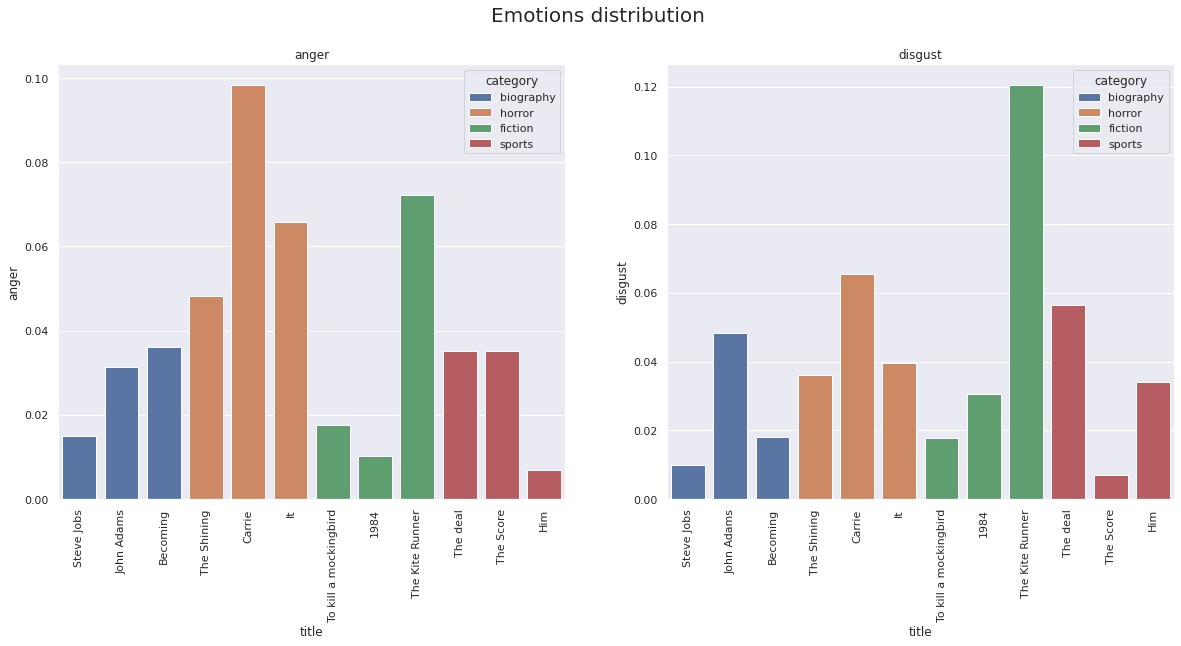

In [395]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def emotions_mapping(em1, em2):
  sns.set(font_scale = 1)
  fig, axes = plt.subplots(1, 2,figsize=(20,8))

  g= sns.barplot(x = 'title', y = em1,data = books_data_EDA, ax = axes[0], hue="category",dodge=False)
  g= sns.barplot(x = 'title', y = em2,data = books_data_EDA, ax = axes[1], hue="category", dodge=False)
  axes[0].set_xticklabels(labels = books_data_EDA["title"].values, rotation=90)
  axes[0].set_title(em1)
  axes[1].set_xticklabels(labels = books_data_EDA["title"].values, rotation=90)
  axes[1].set_title(em2)
  
  plt.suptitle("Emotions distribution", fontsize = 20)

emotions_mapping('anger', 'disgust')








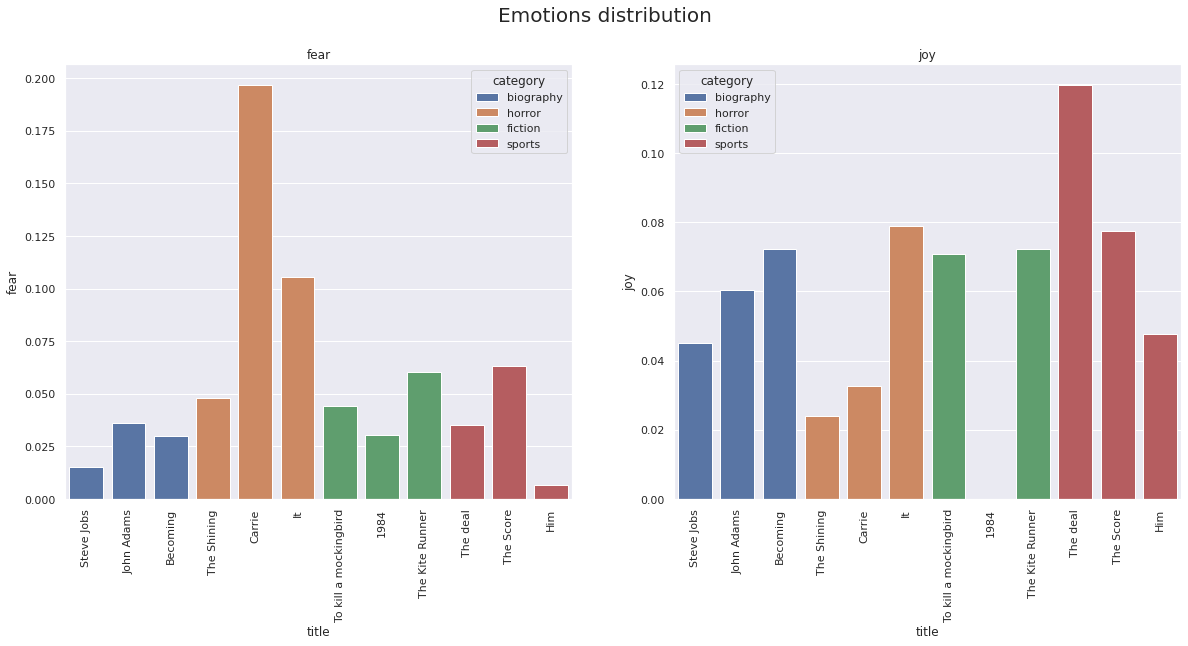

In [396]:
emotions_mapping('fear', 'joy')


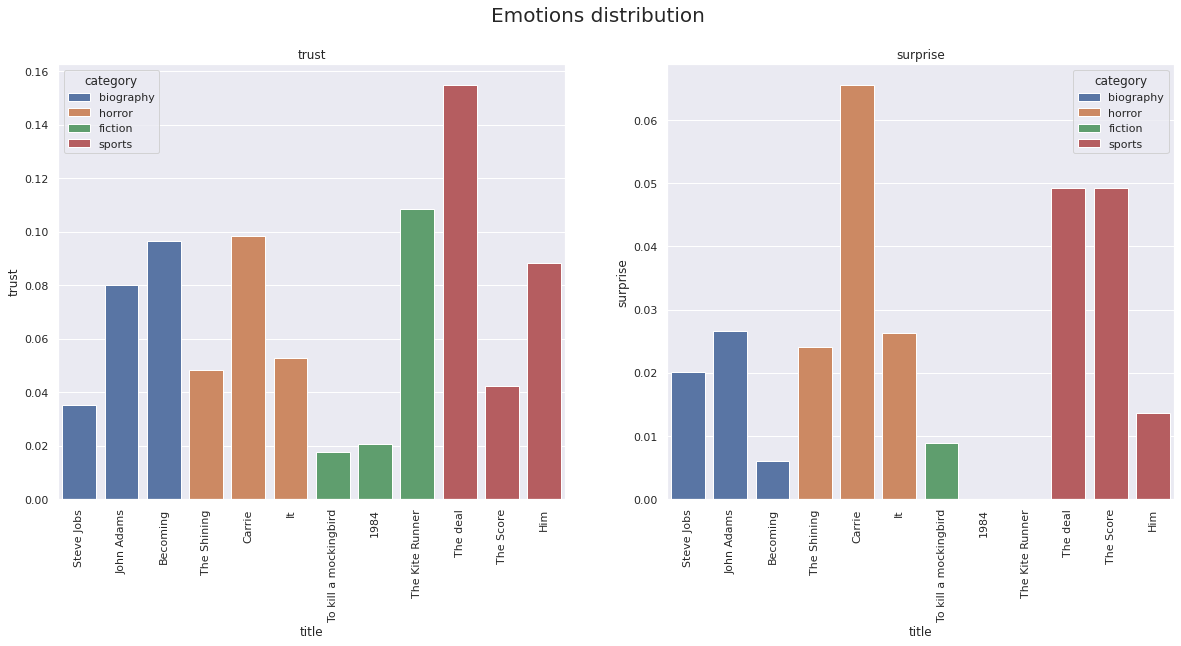

In [397]:
emotions_mapping('trust', 'surprise')


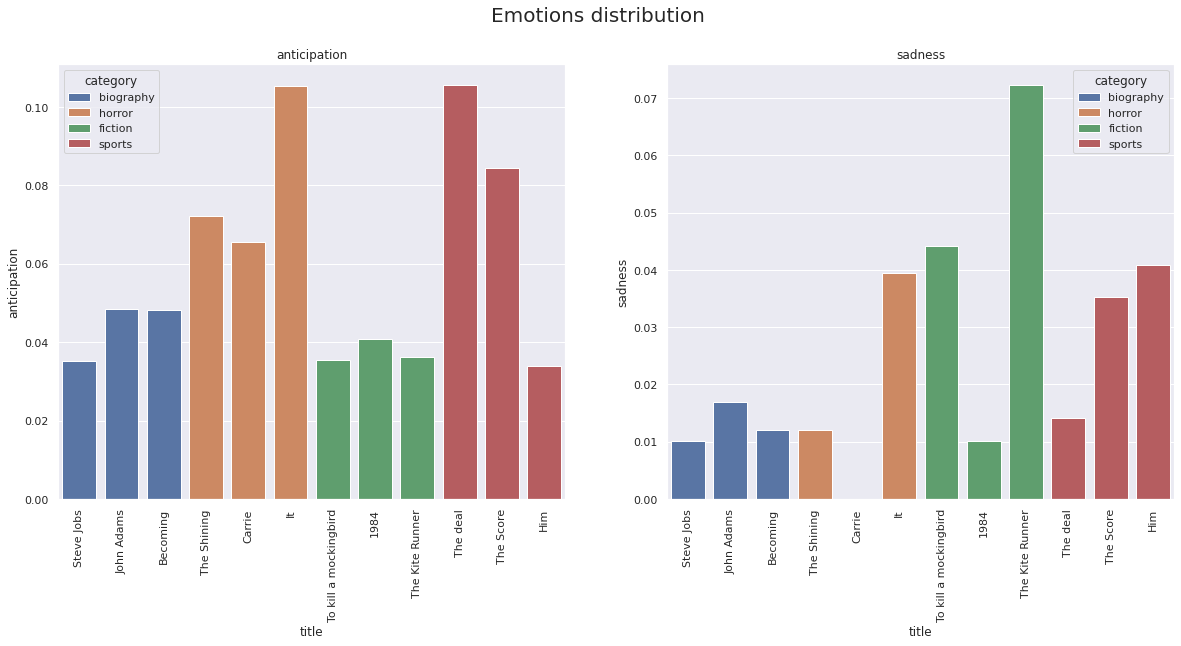

In [398]:
emotions_mapping('anticipation', 'sadness')


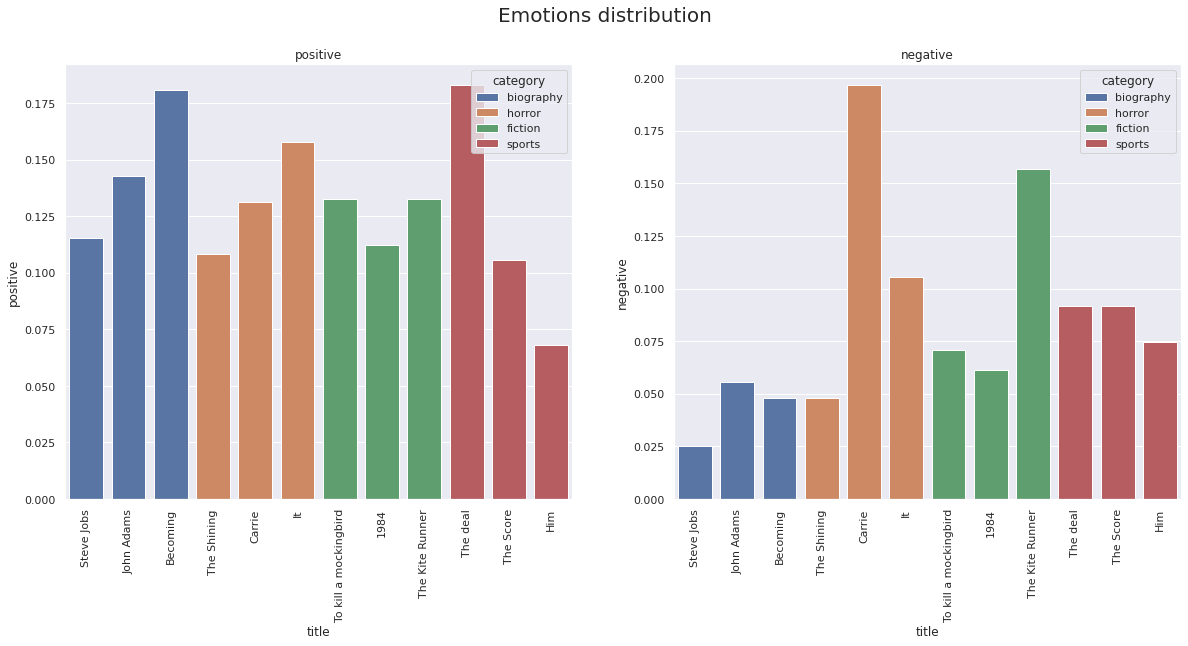

In [399]:
emotions_mapping('positive', 'negative')